# Introduction

This study focuses on the analysis of a comprehensive dataset containing 581,012 entries and 55 columns, designed to evaluate the performance of various machine learning models in predicting forest cover types. The dataset includes a range of environmental and topographic features such as elevation, aspect, slope, distances to hydrology, roadways, and fire points, as well as hillshade indices and categorical variables representing soil types and wilderness areas. All features are represented as integers, with a total memory usage of 243.8 MB. The target variable, `Cover_Type`, ranges from 1 to 7, indicating different forest cover types, while predictor variables exhibit diverse statistical properties, including significant variability in elevation (1859 to 3858 meters) and distances.

## Dataset: https://www.kaggle.com/datasets/aashish31476/covertype-dataset
| Feature                         | Count      | Mean       | Std       | Min    | 25%    | 50%    | 75%    | Max    |
|---------------------------------|------------|------------|-----------|--------|--------|--------|--------|--------|
| Cover_Type                      | 581012     | 2.051471   | 1.396504  | 1.0    | 1.0    | 2.0    | 2.0    | 7.0    |
| Elevation                       | 581012     | 2959.365301| 279.984734| 1859.0 | 2809.0 | 2996.0 | 3163.0 | 3858.0 |
| Aspect                          | 581012     | 155.656807 | 111.913721| 0.0    | 58.0   | 127.0  | 260.0  | 360.0  |
| Slope                           | 581012     | 14.103704  | 7.488242  | 0.0    | 9.0    | 13.0   | 18.0   | 66.0   |
| Horizontal_Distance_To_Hydrology| 581012     | 269.428217 | 212.549356| 0.0    | 108.0  | 218.0  | 384.0  | 1397.0 |
| Vertical_Distance_To_Hydrology  | 581012     | 46.418855  | 58.295232 | -173.0 | 7.0    | 30.0   | 69.0   | 601.0  |
| Horizontal_Distance_To_Roadways | 581012     | 2350.146611| 1559.254870| 0.0    | 1106.0 | 1997.0 | 3328.0 | 7117.0 |
| Hillshade_9am                   | 581012     | 212.146049 | 26.769889 | 0.0    | 198.0  | 218.0  | 231.0  | 254.0  |
| Hillshade_Noon                  | 581012     | 223.318716 | 19.768697 | 0.0    | 213.0  | 226.0  | 237.0  | 254.0  |
| Hillshade_3pm                   | 581012     | 142.528263 | 38.274529 | 0.0    | 119.0  | 143.0  | 168.0  | 254.0  |

## Categorical Features Summary
| Feature            | Count      | Mean       | Std       | Min    | 25%    | 50%    | 75%    | Max    |
|--------------------|------------|------------|-----------|--------|--------|--------|--------|--------|
| Soil_Type34        | 581012     | 0.044175   | 0.205483  | 0.0    | 0.0    | 0.0    | 0.0    | 1.0    |
| Soil_Type35        | 581012     | 0.090392   | 0.286743  | 0.0    | 0.0    | 0.0    | 0.0    | 1.0    |
| Soil_Type36        | 581012     | 0.077716   | 0.267725  | 0.0    | 0.0    | 0.0    | 0.0    | 1.0    |
| Soil_Type37        | 581012     | 0.002773   | 0.052584  | 0.0    | 0.0    | 0.0    | 0.0    | 1.0    |
| Wilderness_Area2   | 581012     | 0.026803   | 0.161508  | 0.0    | 0.0    | 0.0    | 0.0    | 1.0    |
| Wilderness_Area3   | 581012     | 0.023762   | 0.152307  | 0.0    | 0.0    | 0.0    | 0.0    | 1.0    |
| Wilderness_Area4   | 581012     | 0.015060   | 0.121791  | 0.0    | 0.0    | 0.0    | 0.0    | 1.0    |

The dataset's extensive range and variability provide a robust foundation for model training and evaluation. Conducted on August 03, 2025, this analysis aims to leverage these features to identify the most effective model for predicting forest cover types, with results to be detailed in subsequent sections.

In [43]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2
from scipy.stats import kendalltau
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from datetime import datetime
import os
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Rectangle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [44]:
data = pd.read_csv("Covertype.csv")

In [45]:
data.head(4)

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,5,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,5,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,2,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,2,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Cover_Type                          581012 non-null  int64
 1   Elevation                           581012 non-null  int64
 2   Aspect                              581012 non-null  int64
 3   Slope                               581012 non-null  int64
 4   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 5   Vertical_Distance_To_Hydrology      581012 non-null  int64
 6   Horizontal_Distance_To_Roadways     581012 non-null  int64
 7   Hillshade_9am                       581012 non-null  int64
 8   Hillshade_Noon                      581012 non-null  int64
 9   Hillshade_3pm                       581012 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 11  Wilderness_Area1                    581012 non-null 

In [47]:
data.describe()

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2.051471,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,1.396504,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
data.isnull().sum()

Cover_Type                            0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0


In [49]:
data.columns.tolist()

['Cover_Type',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [50]:

categorical_columns = ['Cover_Type','Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

numerical_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points']

soil_types = [f'Soil_Type{i}' for i in range(1, 41)]

def plot_categorical(df, column):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=column, data=df)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    value_counts = df[column].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column}')
    plt.tight_layout()
    plt.show()

def plot_numerical(df, column, bins=30):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=bins, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()
    
def plot_soil_types(df, soil_types):
    soil_prevalence = df[soil_types].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(15, 6))
    sns.barplot(x=soil_prevalence.index, y=soil_prevalence.values)
    plt.title('Prevalence of Soil Types (Proportion of 1s)')
    plt.xlabel('Soil Type')
    plt.ylabel('Proportion')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


Generating plots for numerical column: Elevation


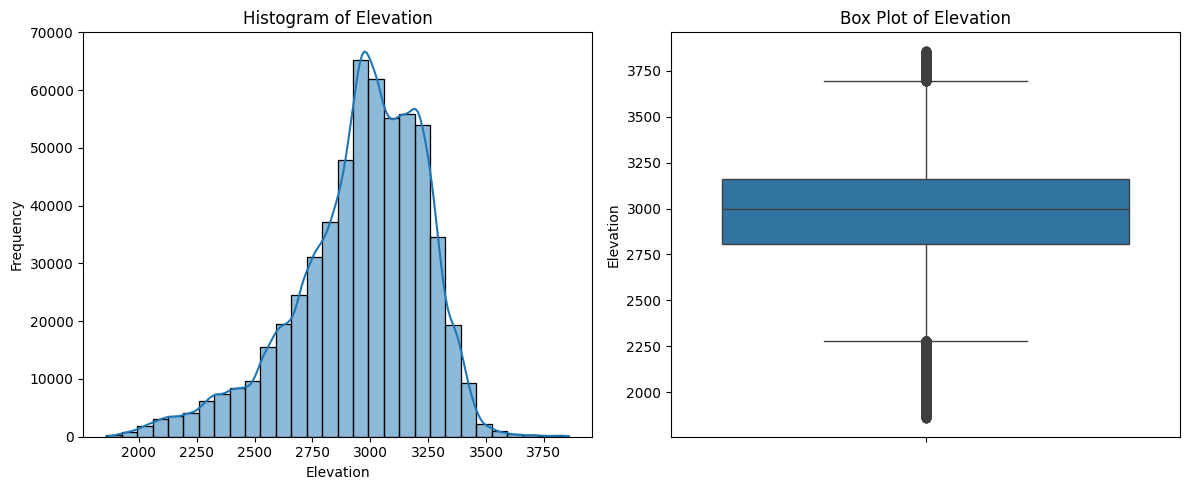

Generating plots for numerical column: Aspect


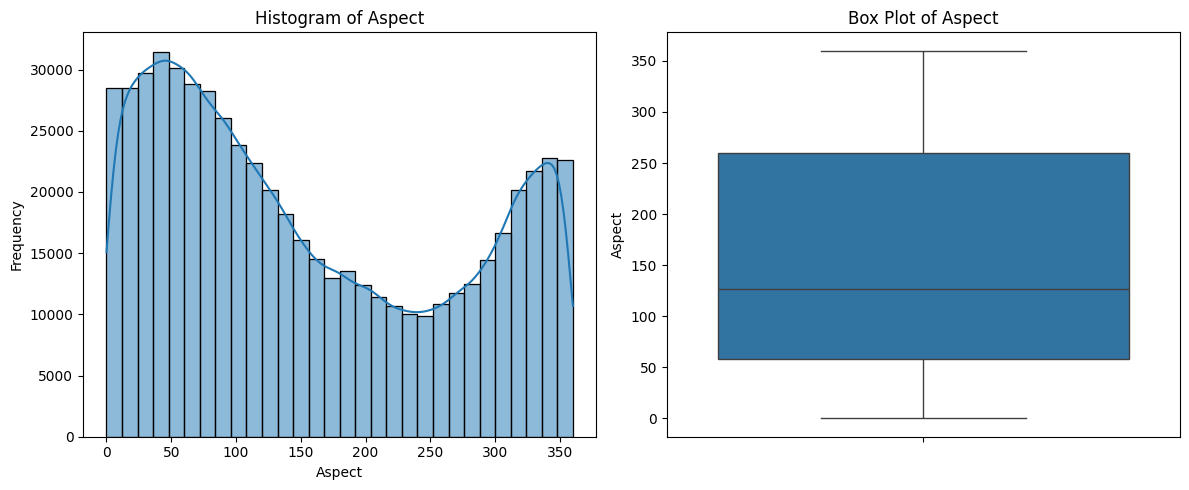

Generating plots for numerical column: Slope


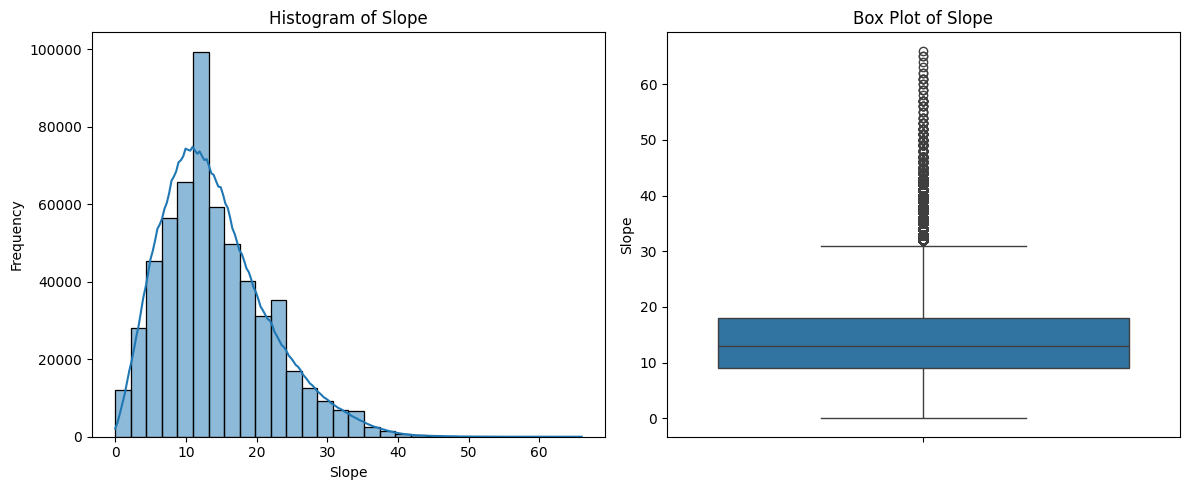

Generating plots for numerical column: Horizontal_Distance_To_Hydrology


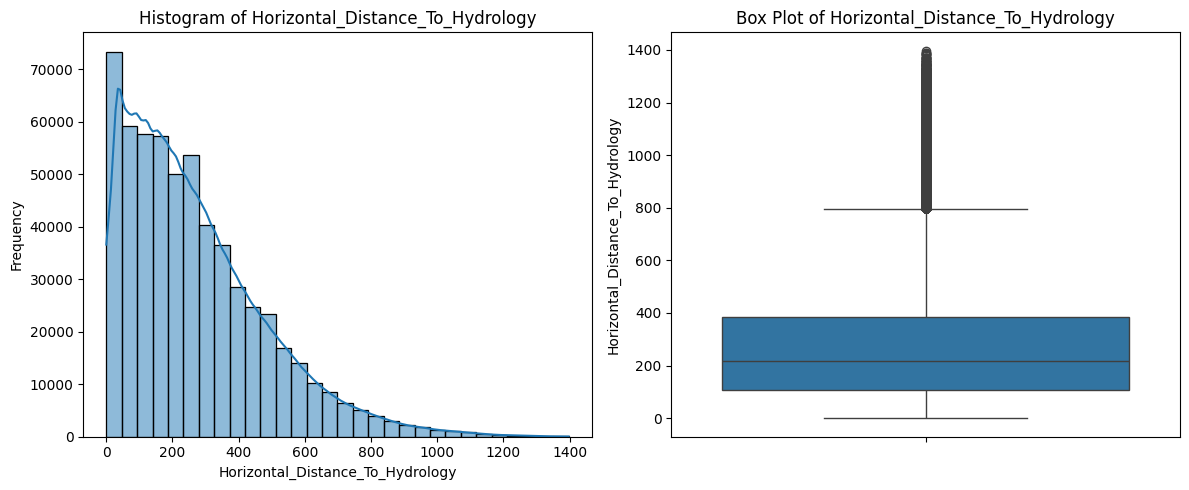

Generating plots for numerical column: Vertical_Distance_To_Hydrology


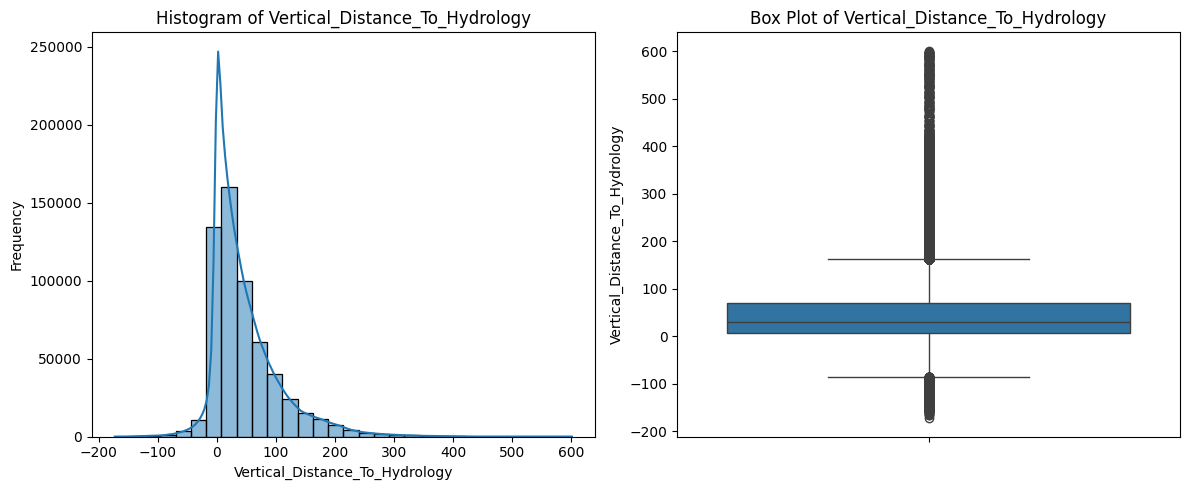

Generating plots for numerical column: Horizontal_Distance_To_Roadways


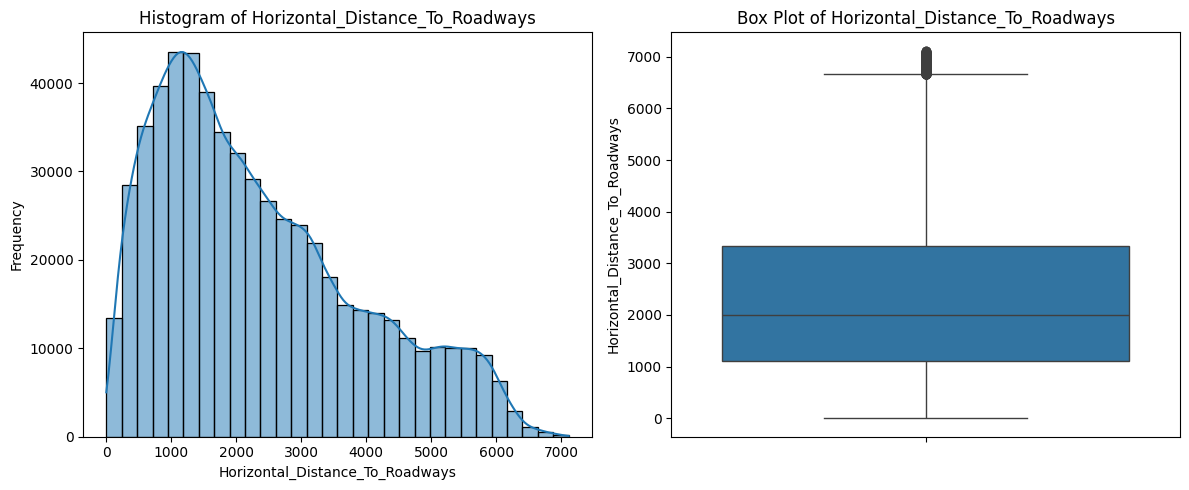

Generating plots for numerical column: Hillshade_9am


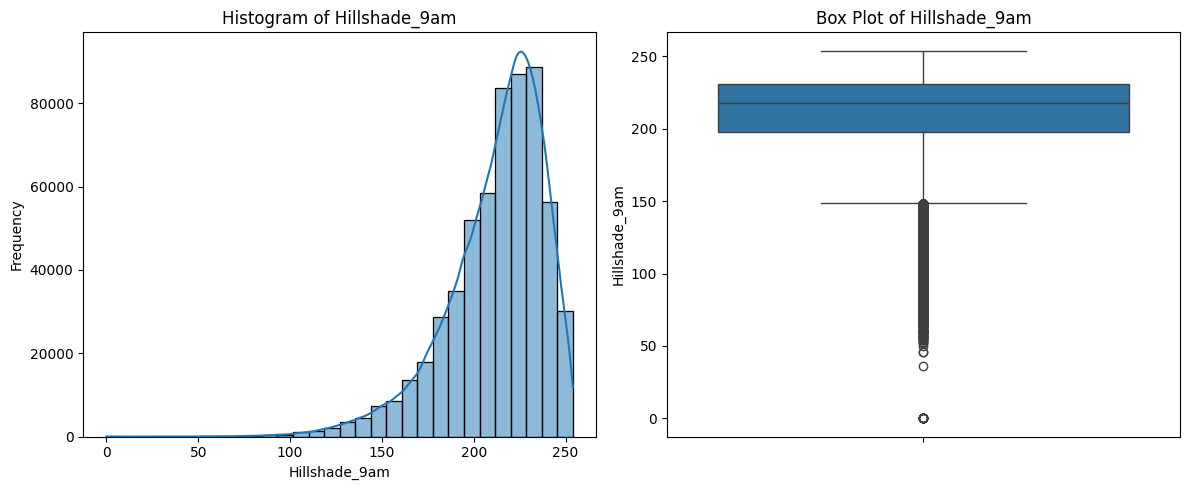

Generating plots for numerical column: Hillshade_Noon


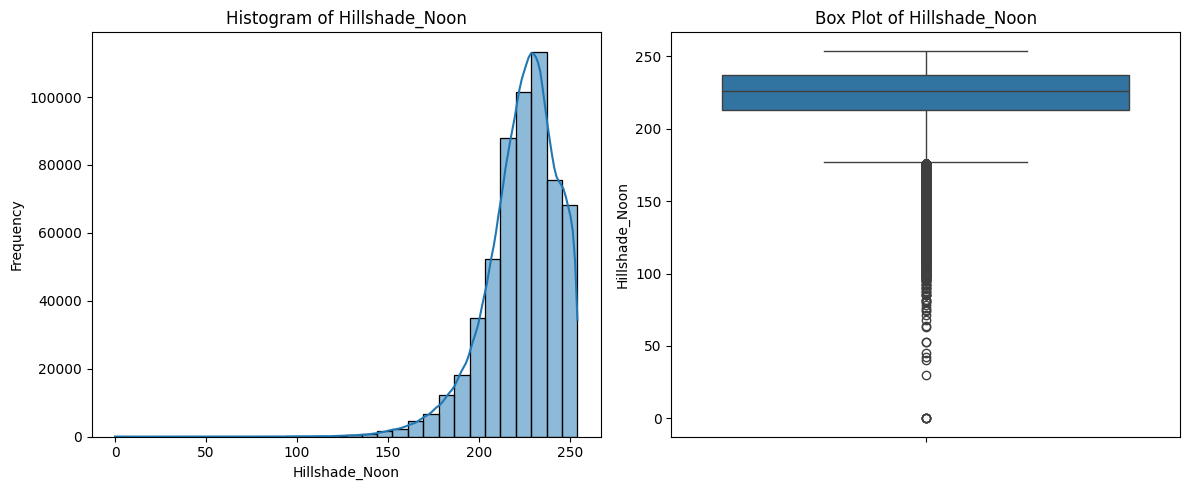

Generating plots for numerical column: Hillshade_3pm


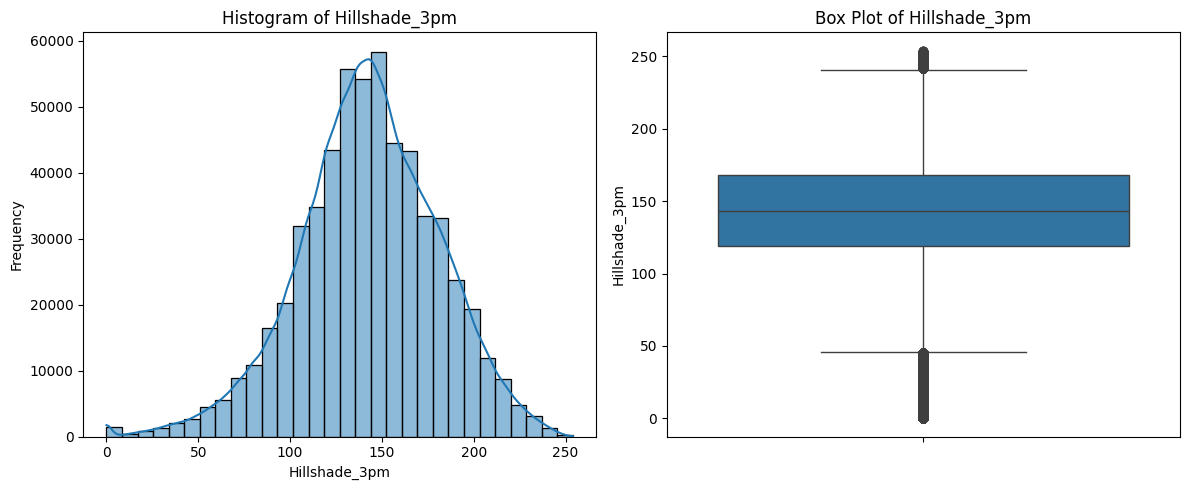

Generating plots for numerical column: Horizontal_Distance_To_Fire_Points


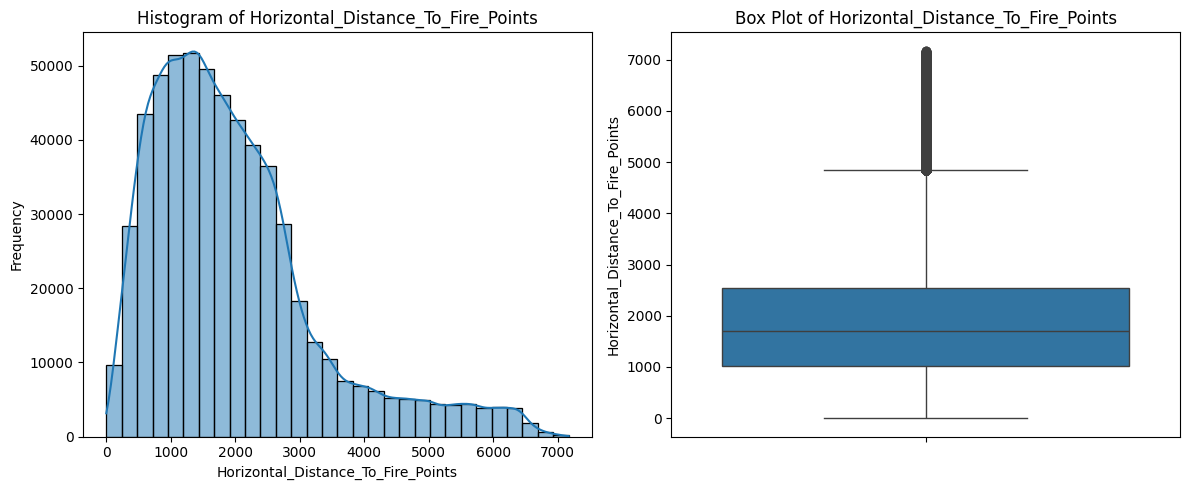

In [51]:
for column in numerical_columns:
    print(f"Generating plots for numerical column: {column}")
    plot_numerical(data, column)

#### Distribution Analysis of Numerical Columns

The following graphs illustrate the distribution of data for the numerical columns `Cover_Type` and `Wilderness_Area1` to `Wilderness_Area4`. Each pair consists of a bar plot and a corresponding pie chart to provide a comprehensive view of the data distribution.

##### Cover_Type Distribution
- **Bar Plot**: 
  - The bar plot shows the count of each `Cover_Type` category.
  - The highest count is observed for `Cover_Type 2` (approximately 250,000), followed by `Cover_Type 1` (around 200,000).
  - Other `Cover_Type` categories (3, 4, 5, 6, and 7) have significantly lower counts, with values ranging from a few thousand to around 50,000.
- **Pie Chart**: 
  - The pie chart highlights the proportional distribution.
  - `Cover_Type 2` accounts for 48.8%, the largest portion.
  - `Cover_Type 1` represents 30.5%.
  - The remaining types (3, 4, 5, 6, and 7) collectively make up 20.7%, with individual percentages ranging from 6.2% to 0.3%.

##### Wilderness_Area1 Distribution
- **Bar Plot**: 
  - The bar plot indicates the count for `Wilderness_Area1`.
  - `Wilderness_Area1 0` has a count of approximately 300,000, while `Wilderness_Area1 1` has around 250,000.
- **Pie Chart**: 
  - The pie chart shows `Wilderness_Area1 0` at 55.1% and `Wilderness_Area1 1` at 44.9%, indicating a relatively balanced distribution.

##### Wilderness_Area2 Distribution
- **Bar Plot**: 
  - The bar plot shows a dominant count for `Wilderness_Area2 0` (around 500,000), with `Wilderness_Area2 1` having a much lower count (less than 50,000).
- **Pie Chart**: 
  - The pie chart reflects this with `Wilderness_Area2 0` at 97.3% and `Wilderness_Area2 1` at 2.7%, indicating a highly skewed distribution.

##### Wilderness_Area3 Distribution
- **Bar Plot**: 
  - Similar to `Wilderness_Area2`, `Wilderness_Area3 0` has a count of approximately 500,000, while `Wilderness_Area3 1` is minimal (less than 50,000).
- **Pie Chart**: 
  - The pie chart shows `Wilderness_Area3 0` at 97.6% and `Wilderness_Area3 1` at 2.4%, again indicating a highly skewed distribution.

##### Wilderness_Area4 Distribution
- **Bar Plot**: 
  - The bar plot shows `Wilderness_Area4 0` with a count of around 600,000, while `Wilderness_Area4 1` is significantly lower (less than 50,000).
- **Pie Chart**: 
  - The pie chart indicates `Wilderness_Area4 0` at 98.5% and `Wilderness_Area4 1` at 1.5%, showing the most skewed distribution among the wilderness areas.

#### Summary
- `Cover_Type` exhibits a varied distribution with `Cover_Type 2` and `1` dominating.
- `Wilderness_Area1` is fairly balanced between 0 and 1.
- `Wilderness_Area2`, `Wilderness_Area3`, and `Wilderness_Area4` are heavily skewed towards 0, with very small proportions for 1.

Generating plots for categorical column: Cover_Type


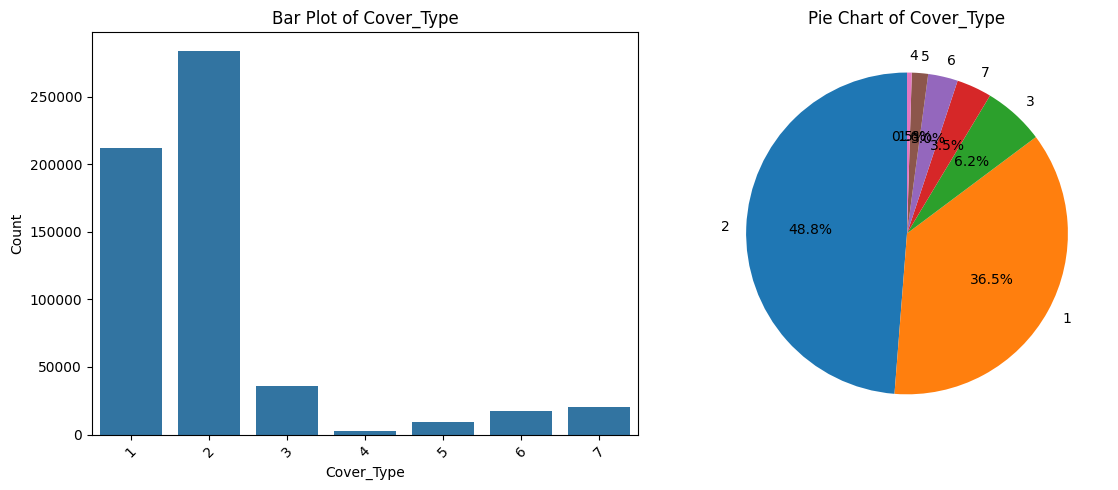

Generating plots for categorical column: Wilderness_Area1


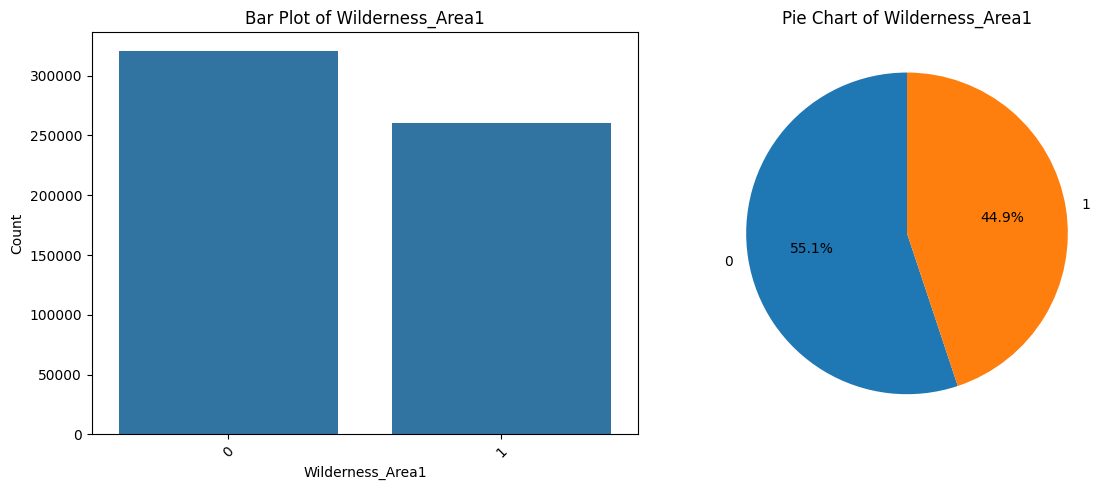

Generating plots for categorical column: Wilderness_Area2


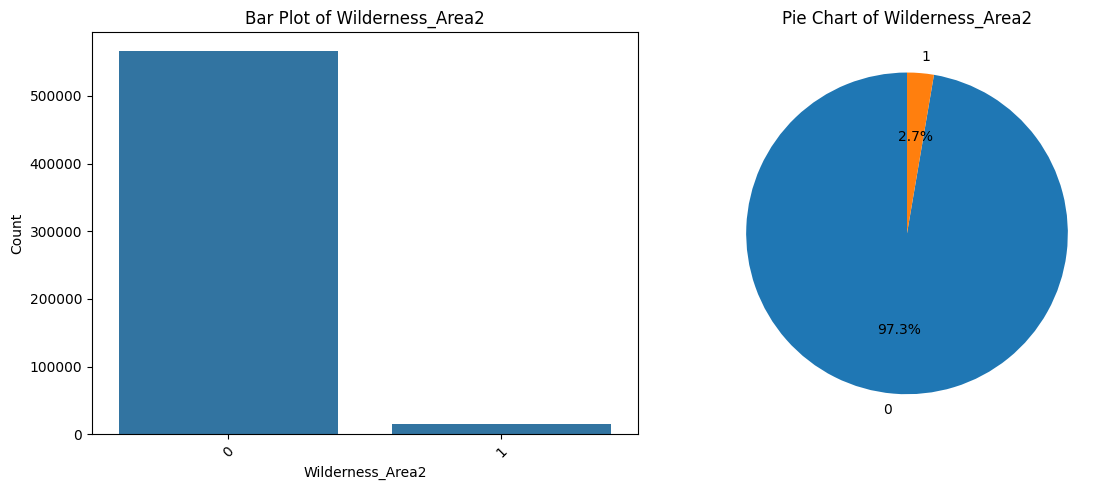

Generating plots for categorical column: Wilderness_Area3


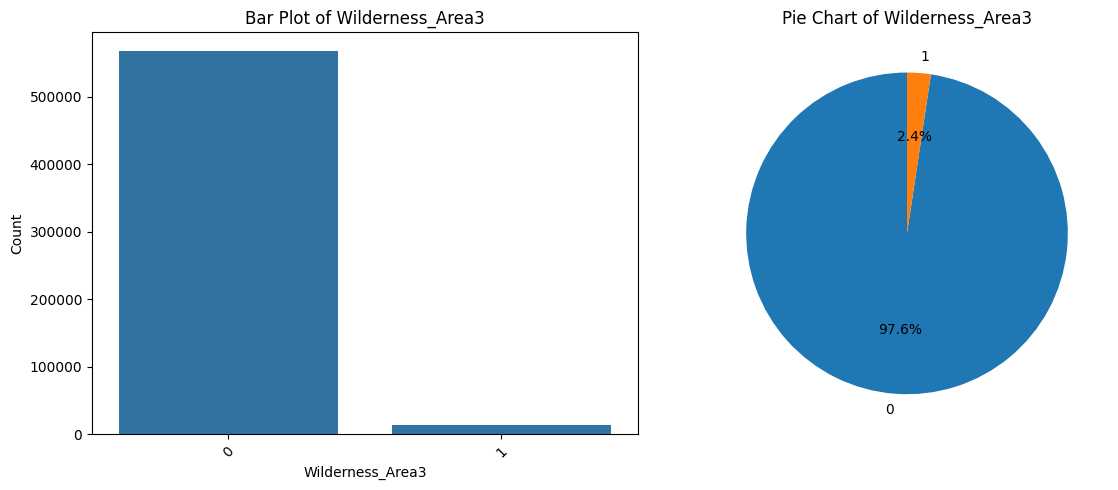

Generating plots for categorical column: Wilderness_Area4


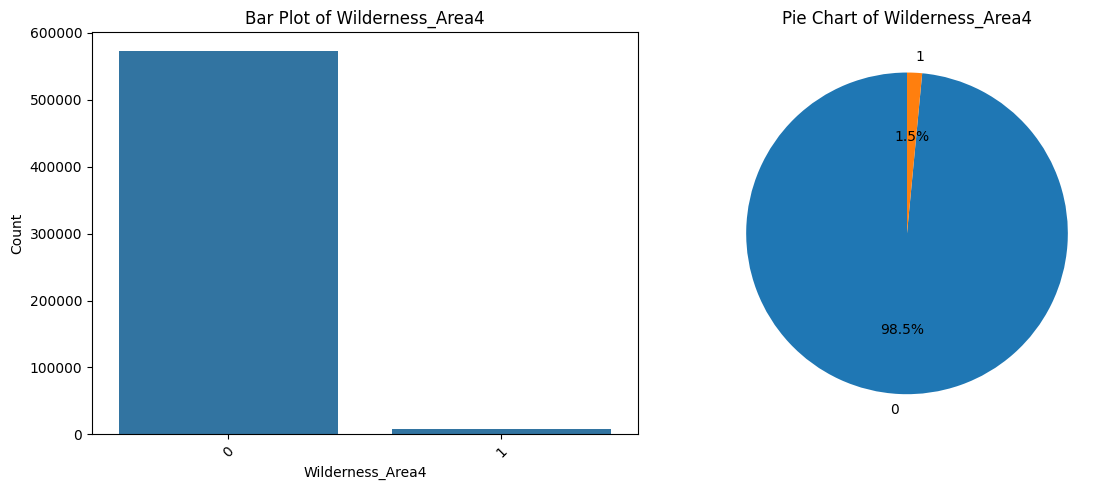

In [52]:
for column in categorical_columns:
    print(f"Generating plots for categorical column: {column}")
    plot_categorical(data, column)

#### Distribution Analysis of Numerical Columns

The following graphs illustrate the distribution of data for the numerical columns `Cover_Type` and `Wilderness_Area1` to `Wilderness_Area4`. Each pair consists of a bar plot and a corresponding pie chart to provide a comprehensive view of the data distribution.

##### Cover_Type Distribution
- **Bar Plot**: 
  - The bar plot shows the count of each `Cover_Type` category.
  - The highest count is observed for `Cover_Type 2` (approximately 250,000), followed by `Cover_Type 1` (around 200,000).
  - Other `Cover_Type` categories (3, 4, 5, 6, and 7) have significantly lower counts, with values ranging from a few thousand to around 50,000.
- **Pie Chart**: 
  - The pie chart highlights the proportional distribution.
  - `Cover_Type 2` accounts for 48.8%, the largest portion.
  - `Cover_Type 1` represents 30.5%.
  - The remaining types (3, 4, 5, 6, and 7) collectively make up 20.7%, with individual percentages ranging from 6.2% to 0.3%.

##### Wilderness_Area1 Distribution
- **Bar Plot**: 
  - The bar plot indicates the count for `Wilderness_Area1`.
  - `Wilderness_Area1 0` has a count of approximately 300,000, while `Wilderness_Area1 1` has around 250,000.
- **Pie Chart**: 
  - The pie chart shows `Wilderness_Area1 0` at 55.1% and `Wilderness_Area1 1` at 44.9%, indicating a relatively balanced distribution.

##### Wilderness_Area2 Distribution
- **Bar Plot**: 
  - The bar plot shows a dominant count for `Wilderness_Area2 0` (around 500,000), with `Wilderness_Area2 1` having a much lower count (less than 50,000).
- **Pie Chart**: 
  - The pie chart reflects this with `Wilderness_Area2 0` at 97.3% and `Wilderness_Area2 1` at 2.7%, indicating a highly skewed distribution.

##### Wilderness_Area3 Distribution
- **Bar Plot**: 
  - Similar to `Wilderness_Area2`, `Wilderness_Area3 0` has a count of approximately 500,000, while `Wilderness_Area3 1` is minimal (less than 50,000).
- **Pie Chart**: 
  - The pie chart shows `Wilderness_Area3 0` at 97.6% and `Wilderness_Area3 1` at 2.4%, again indicating a highly skewed distribution.

##### Wilderness_Area4 Distribution
- **Bar Plot**: 
  - The bar plot shows `Wilderness_Area4 0` with a count of around 600,000, while `Wilderness_Area4 1` is significantly lower (less than 50,000).
- **Pie Chart**: 
  - The pie chart indicates `Wilderness_Area4 0` at 98.5% and `Wilderness_Area4 1` at 1.5%, showing the most skewed distribution among the wilderness areas.

##### Summary
- `Cover_Type` exhibits a varied distribution with `Cover_Type 2` and `1` dominating.
- `Wilderness_Area1` is fairly balanced between 0 and 1.
- `Wilderness_Area2`, `Wilderness_Area3`, and `Wilderness_Area4` are heavily skewed towards 0, with very small proportions for 1.

Generating collective plots for soil types


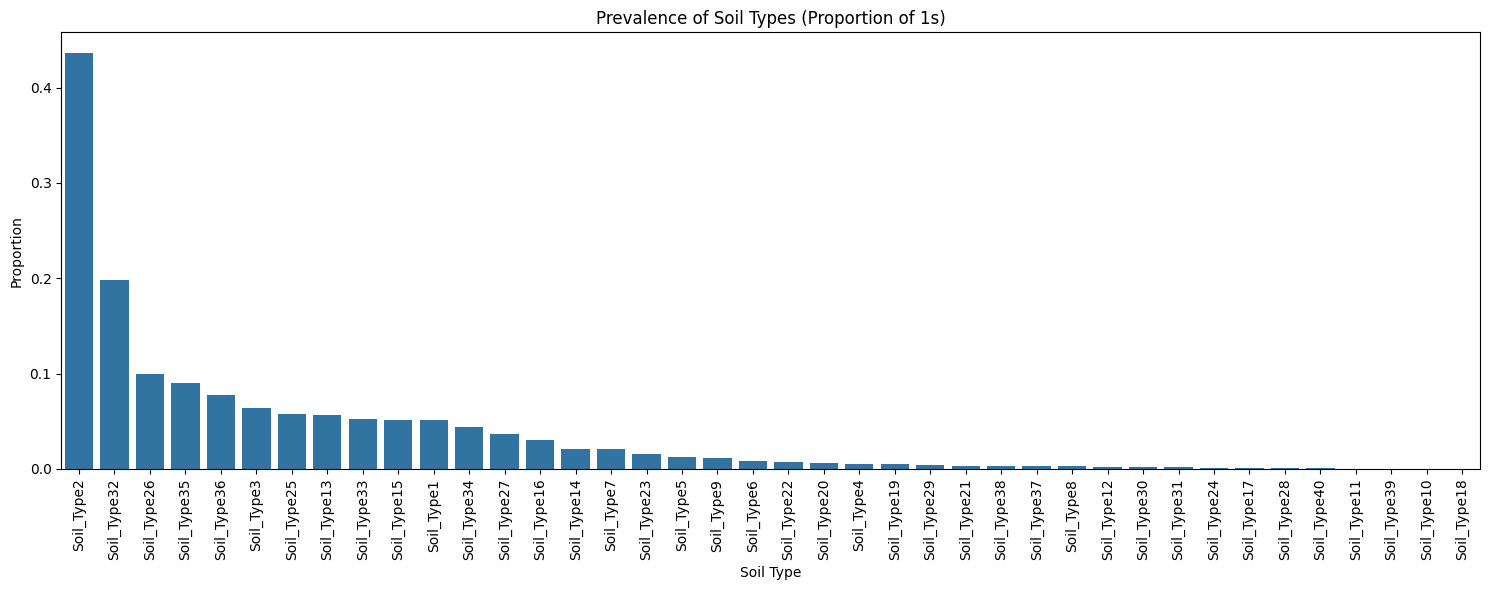

In [53]:
print("Generating collective plots for soil types")
plot_soil_types(data, soil_types)

##### Soil Type Prevalence
This bar chart shows the prevalence of soil types as proportions, revealing a highly skewed distribution where Soil_Type2 dominates (~43% prevalence), followed by Soil_Type32 (~20%), with most other soil types having very low prevalence (<10%) and many rare types appearing at less than 1%.

In [54]:

categorical_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
numerical_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points']
soil_types = [f'Soil_Type{i}' for i in range(1, 41)]
target_column = 'Cover_Type'

def plot_heatmap(df, columns, title):
    grouped_data = df.groupby(target_column)[columns].mean()
    
    plt.figure(figsize=(max(8, len(columns) * 0.4), 6))
    sns.heatmap(grouped_data, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Mean Value'})
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Cover Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Displaying heatmap for numerical columns


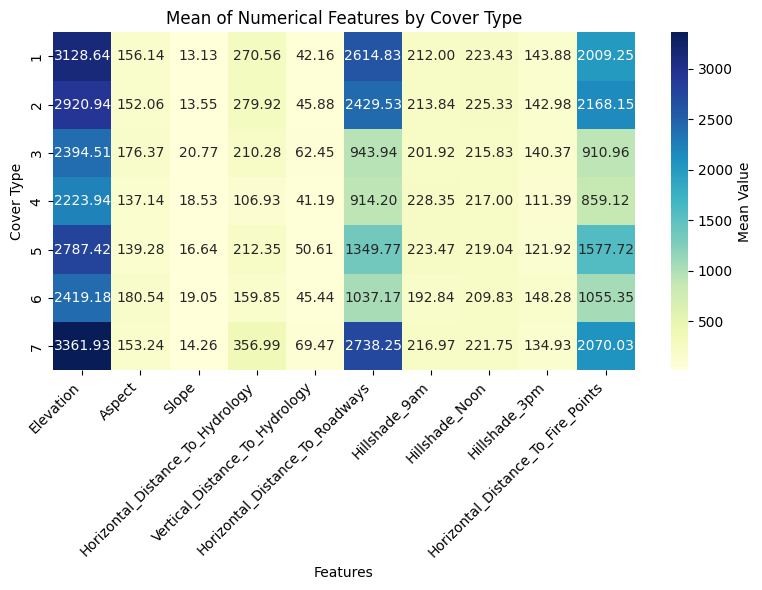

In [55]:
# Plot heatmap for numerical columns
print("Displaying heatmap for numerical columns")
plot_heatmap(data, numerical_columns, 'Mean of Numerical Features by Cover Type')

##### Heatmap Analysis


##### Numerical Features
This heatmap shows the mean values of 10 numerical features across 7 cover types. Elevation exhibits the strongest variation (dark blue, ranging from ~2200-3400m), with Cover Type 7 having the highest elevation and Cover Type 4 the lowest. Other features like distances to roadways and fire points show moderate variation, while topographical features (aspect, slope, hydrology) display relatively consistent values across cover types.

Displaying heatmap for categorical columns (Wilderness Areas)


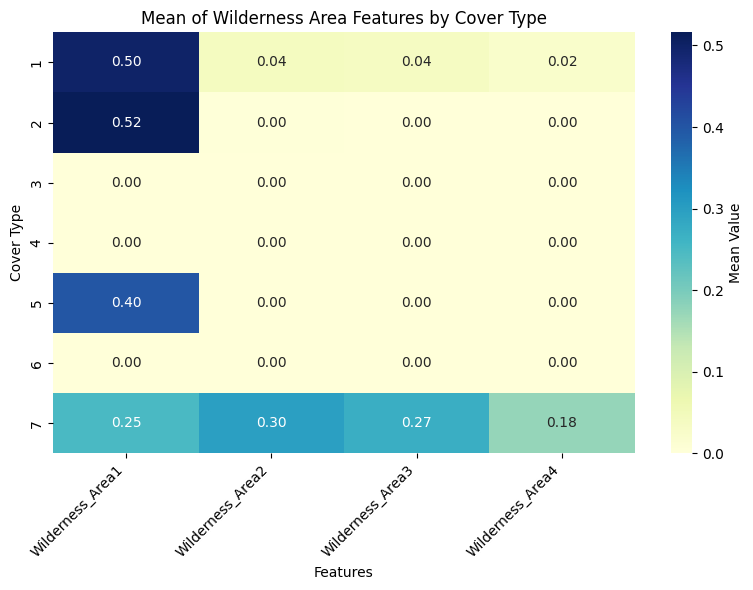

In [56]:
# Plot heatmap for categorical columns
print("Displaying heatmap for categorical columns (Wilderness Areas)")
plot_heatmap(data, categorical_columns, 'Mean of Wilderness Area Features by Cover Type')

##### Heatmap Analysis

##### Wilderness Area Features
This heatmap displays the mean values of four wilderness area features across 7 cover types. Cover Types 1, 2, and 5 show exclusive associations with specific wilderness areas (highest values of 0.50-0.52), while Cover Type 7 shows moderate presence across all wilderness areas (0.18-0.30), and Cover Types 3, 4, and 6 show no wilderness area associations.

Displaying heatmap for soil type columns


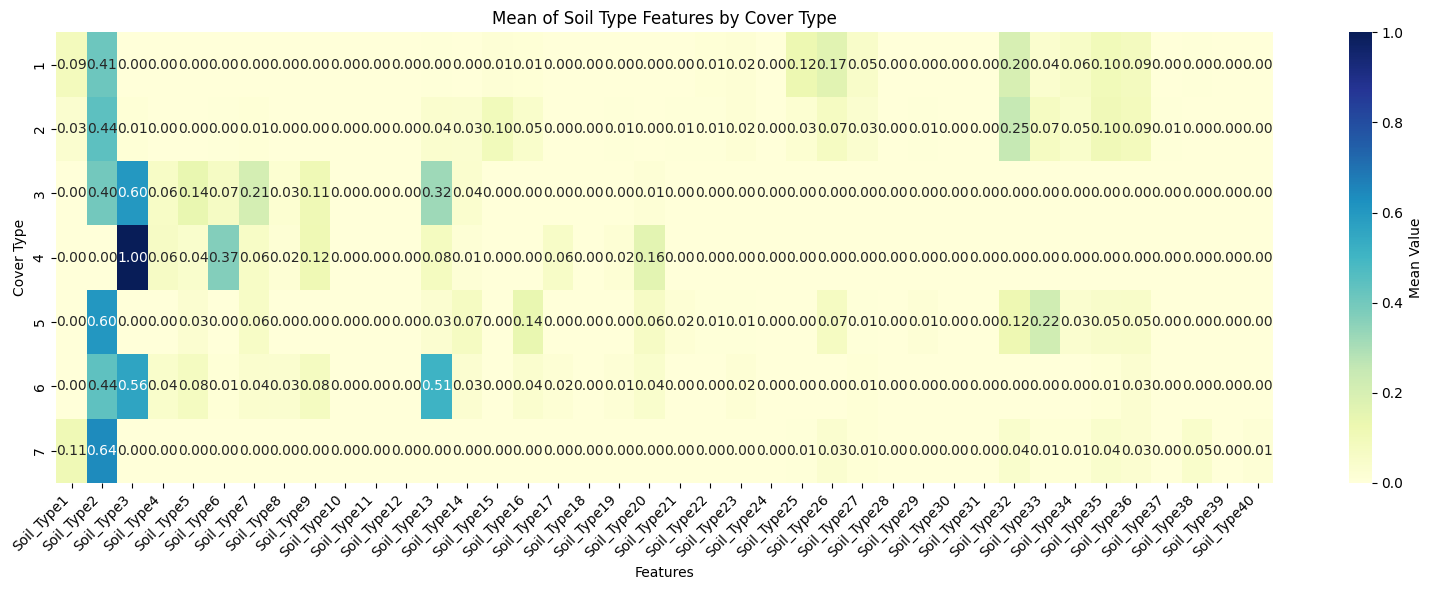

In [57]:
# Plot heatmap for soil type columns
print("Displaying heatmap for soil type columns")
plot_heatmap(data, soil_types, 'Mean of Soil Type Features by Cover Type')

#### Heatmap Analysis

This heatmap shows the mean values of different soil type features (Soil_Type1 through Soil_Type40) across 7 different cover types. The visualization reveals that most soil types have very low mean values (appearing light green/white), with only a few soil types showing higher concentrations (darker blue) in specific cover types, particularly Cover Types 3 and 4 which exhibit the strongest associations with certain soil characteristics.

In [58]:

for col in numerical_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    percent_outliers = (outliers.count() / data[col].count()) * 100
    print(f"{col}: {percent_outliers:.2f}% outliers")

Elevation: 2.68% outliers
Aspect: 0.00% outliers
Slope: 2.64% outliers
Horizontal_Distance_To_Hydrology: 2.51% outliers
Vertical_Distance_To_Hydrology: 5.42% outliers
Horizontal_Distance_To_Roadways: 0.12% outliers
Hillshade_9am: 3.00% outliers
Hillshade_Noon: 2.70% outliers
Hillshade_3pm: 1.35% outliers
Horizontal_Distance_To_Fire_Points: 5.36% outliers


In [59]:

def check_log_transformation(df, num_cols, skewness_threshold=1.0):
    columns_to_transform = []
    
    print("Checking skewness for numerical columns:")
    for col in num_cols:
        col_skew = skew(df[col].dropna())
        print(f"Column: {col}, Skewness: {col_skew:.3f}")
        
        if abs(col_skew) > skewness_threshold:
            columns_to_transform.append(col)
            print(f" -> {col} needs log transformation (skewness = {col_skew:.3f})")
            
    return columns_to_transform

columns_to_log = check_log_transformation(data, numerical_columns)

Checking skewness for numerical columns:
Column: Elevation, Skewness: -0.818
Column: Aspect, Skewness: 0.403
Column: Slope, Skewness: 0.789
Column: Horizontal_Distance_To_Hydrology, Skewness: 1.140
 -> Horizontal_Distance_To_Hydrology needs log transformation (skewness = 1.140)
Column: Vertical_Distance_To_Hydrology, Skewness: 1.790
 -> Vertical_Distance_To_Hydrology needs log transformation (skewness = 1.790)
Column: Horizontal_Distance_To_Roadways, Skewness: 0.714
Column: Hillshade_9am, Skewness: -1.181
 -> Hillshade_9am needs log transformation (skewness = -1.181)
Column: Hillshade_Noon, Skewness: -1.063
 -> Hillshade_Noon needs log transformation (skewness = -1.063)
Column: Hillshade_3pm, Skewness: -0.277
Column: Horizontal_Distance_To_Fire_Points, Skewness: 1.289
 -> Horizontal_Distance_To_Fire_Points needs log transformation (skewness = 1.289)


In [60]:
categorical_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
numerical_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points']
soil_types = [f'Soil_Type{i}' for i in range(1, 41)]
target_column = 'Cover_Type'

X = data[numerical_columns + categorical_columns + soil_types]
y = data[target_column]

feature_scores = {}

# 1. ANOVA for numerical columns
anova_scores, _ = f_classif(X[numerical_columns], y)
for col, score in zip(numerical_columns, anova_scores):
    feature_scores[col] = score

# 2. Kendall's Tau for numerical columns
for col in numerical_columns:
    tau, _ = kendalltau(X[col], y)
    feature_scores[f"{col}_kendall"] = abs(tau)  # Use absolute value for ranking

# 3. Chi-squared for categorical and soil type columns
cat_cols = categorical_columns + soil_types
X_cat = X[cat_cols].copy()
for col in categorical_columns:
    if X_cat[col].dtype == 'object' or X_cat[col].dtype.name == 'category':
        le = LabelEncoder()
        X_cat[col] = le.fit_transform(X_cat[col])

chi2_scores, _ = chi2(X_cat, y)
for col, score in zip(cat_cols, chi2_scores):
    feature_scores[col] = score

# 4. Mutual Information for categorical and soil type columns
mi_scores = mutual_info_classif(X_cat, y, random_state=42)
for col, score in zip(cat_cols, mi_scores):
    feature_scores[f"{col}_mi"] = score

max_score = max(feature_scores.values())
feature_scores = {k: v / max_score for k, v in feature_scores.items()}

final_scores = {}
for col in numerical_columns + categorical_columns + soil_types:
    scores = [feature_scores.get(col, 0), 
              feature_scores.get(f"{col}_kendall", 0), 
              feature_scores.get(f"{col}_mi", 0)]
    final_scores[col] = np.mean([s for s in scores if s > 0])  # Average non-zero scores

top_features = sorted(final_scores.items(), key=lambda x: x[1], reverse=True)[:55]

# Print top 15 features
print("Top 15 features by importance:")
for i, (feature, score) in enumerate(top_features, 1):
    print(f"{i}. {feature}: {score:.4f}")

Top 15 features by importance:
1. Soil_Type3: 0.5000
2. Elevation: 0.2633
3. Soil_Type13: 0.2067
4. Soil_Type7: 0.1125
5. Wilderness_Area2: 0.1114
6. Wilderness_Area3: 0.1053
7. Soil_Type6: 0.1036
8. Soil_Type5: 0.0932
9. Soil_Type9: 0.0774
10. Wilderness_Area4: 0.0684
11. Wilderness_Area1: 0.0526
12. Soil_Type4: 0.0493
13. Soil_Type25: 0.0418
14. Soil_Type15: 0.0366
15. Soil_Type20: 0.0364
16. Soil_Type26: 0.0311
17. Soil_Type32: 0.0307
18. Soil_Type8: 0.0260
19. Soil_Type17: 0.0242
20. Soil_Type38: 0.0218
21. Soil_Type1: 0.0211
22. Soil_Type33: 0.0204
23. Soil_Type16: 0.0183
24. Horizontal_Distance_To_Roadways: 0.0174
25. Soil_Type40: 0.0138
26. Slope: 0.0132
27. Horizontal_Distance_To_Fire_Points: 0.0123
28. Soil_Type14: 0.0115
29. Soil_Type35: 0.0103
30. Soil_Type36: 0.0081
31. Soil_Type2: 0.0070
32. Soil_Type21: 0.0068
33. Soil_Type27: 0.0067
34. Soil_Type34: 0.0061
35. Hillshade_9am: 0.0055
36. Hillshade_Noon: 0.0050
37. Horizontal_Distance_To_Hydrology: 0.0040
38. Soil_Type39: 0

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


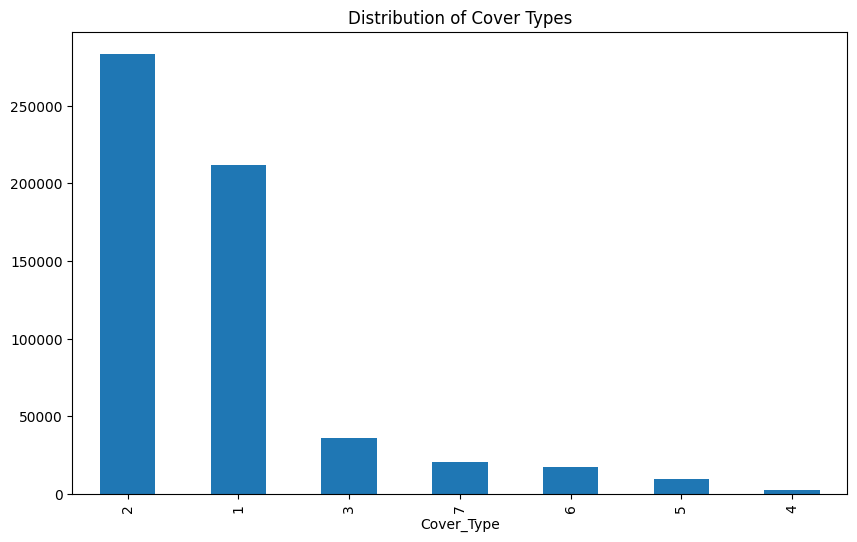

In [61]:
data['Cover_Type'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Cover Types')

print(data['Cover_Type'].value_counts() )

#### Distribution of Cover Types

This bar chart shows the frequency distribution of 7 cover types in the dataset.

##### Key Findings
- **Cover Type 2** is most frequent (~283,000 observations)
- **Cover Type 1** is second most frequent (~211,000 observations)
- **Cover Type 3** has moderate frequency (~35,000 observations)
- **Cover Types 4-7** are relatively rare (2,000-20,000 observations each)

##### Pattern
The distribution is highly imbalanced, with cover types 1 and 2 dominating the dataset while types 4-7 represent much smaller categories.

In [62]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

y_zero_based = y - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Train-Test Gap': [],
    'CV Mean Accuracy': [],
    'CV Std Accuracy': []
}

output_dir = 'model_comparison_plots'
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

def plot_confusion_matrix(y_true, y_pred, model_name, timestamp):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    return cm

def evaluate_model(model_name, model, X_train, y_train, X_test, y_test, results, timestamp):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    gap = train_accuracy - accuracy
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    cm = plot_confusion_matrix(y_test, y_pred, model_name, timestamp)
    print(f"{model_name} Results:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print(f"Train-Test Gap: {gap:.4f}, CV Mean Accuracy: {cv_scores.mean():.4f}, CV Std: {cv_scores.std():.4f}")
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['Train-Test Gap'].append(gap)
    results['CV Mean Accuracy'].append(cv_scores.mean())
    results['CV Std Accuracy'].append(cv_scores.std())
    return {'Parameter': model_name, 'Test Accuracy': accuracy}


Training Random Forest...


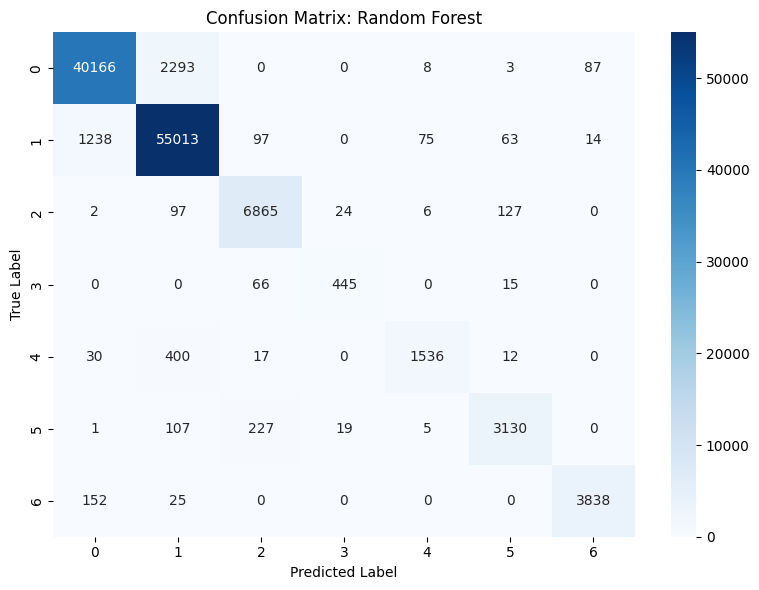

Random Forest Confusion Matrix:
[[40166  2293     0     0     8     3    87]
 [ 1238 55013    97     0    75    63    14]
 [    2    97  6865    24     6   127     0]
 [    0     0    66   445     0    15     0]
 [   30   400    17     0  1536    12     0]
 [    1   107   227    19     5  3130     0]
 [  152    25     0     0     0     0  3838]]
Accuracy: 0.9552, Precision: 0.9553, Recall: 0.9552, F1-Score: 0.9549
Train-Test Gap: 0.0448


In [63]:
print("Training Random Forest...")
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_y_train_pred = rf_model.predict(X_train)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
rf_gap = rf_train_accuracy - rf_accuracy
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, rf_y_pred, average='weighted')
rf_cm = plot_confusion_matrix(y_test, rf_y_pred, 'Random Forest', timestamp)
print(f"Random Forest Confusion Matrix:\n{rf_cm}")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}")
print(f"Train-Test Gap: {rf_gap:.4f}")

Training Random Forest with hyperparemter tuning...


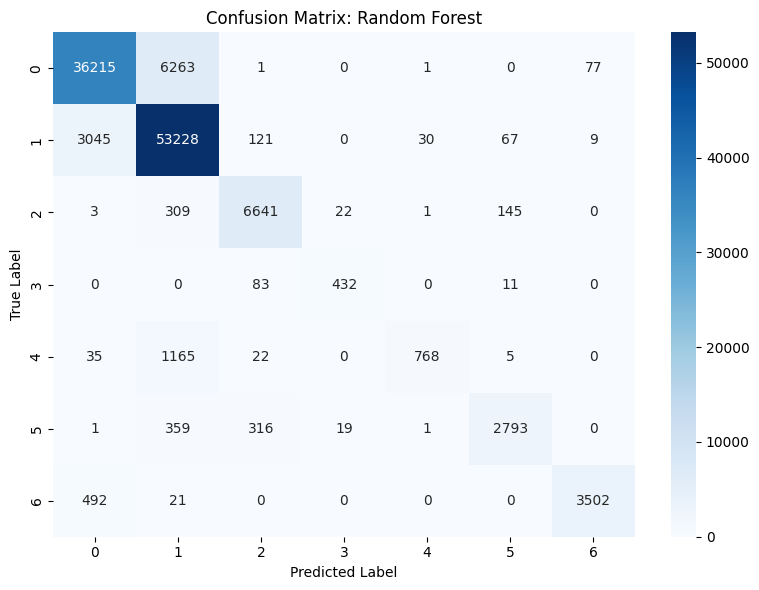

Random Forest Best Params: {'max_depth': 20, 'n_estimators': 200}
Random Forest Confusion Matrix:
[[36215  6263     1     0     1     0    77]
 [ 3045 53228   121     0    30    67     9]
 [    3   309  6641    22     1   145     0]
 [    0     0    83   432     0    11     0]
 [   35  1165    22     0   768     5     0]
 [    1   359   316    19     1  2793     0]
 [  492    21     0     0     0     0  3502]]
Accuracy: 0.8914, Precision: 0.8939, Recall: 0.8914, F1-Score: 0.8892
Train-Test Gap: 0.0309, CV Mean Accuracy: 0.6128, CV Std: 0.0225


In [67]:
print("Training Random Forest with hyperparemter tuning...")
rf_param_grid = {
    'n_estimators': [100,200],  
    'max_depth': [10, 20]   
}
rf_model = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1
)
rf_model.fit(X_train, y_train)
rf_best = rf_model.best_estimator_
rf_y_pred = rf_best.predict(X_test)
rf_y_train_pred = rf_best.predict(X_train)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
rf_gap = rf_train_accuracy - rf_accuracy
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, rf_y_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_best, X, y, cv=3, scoring='accuracy')
rf_cm = plot_confusion_matrix(y_test, rf_y_pred, 'Random Forest', timestamp)
print(f"Random Forest Best Params: {rf_model.best_params_}")
print(f"Random Forest Confusion Matrix:\n{rf_cm}")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}")
print(f"Train-Test Gap: {rf_gap:.4f}, CV Mean Accuracy: {rf_cv_scores.mean():.4f}, CV Std: {rf_cv_scores.std():.4f}")
results['Model'].append('Random Forest')
results['Accuracy'].append(rf_accuracy)
results['Precision'].append(rf_precision)
results['Recall'].append(rf_recall)
results['F1-Score'].append(rf_f1)
results['Train-Test Gap'].append(rf_gap)
results['CV Mean Accuracy'].append(rf_cv_scores.mean())
results['CV Std Accuracy'].append(rf_cv_scores.std())


Training XGBoost...


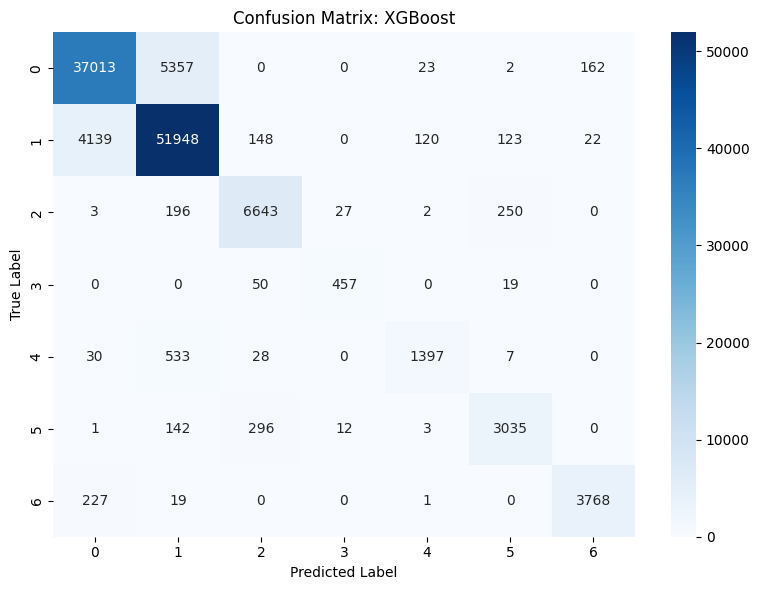

XGBoost Best Params: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 150}
XGBoost Confusion Matrix:
[[37013  5357     0     0    23     2   162]
 [ 4139 51948   148     0   120   123    22]
 [    3   196  6643    27     2   250     0]
 [    0     0    50   457     0    19     0]
 [   30   533    28     0  1397     7     0]
 [    1   142   296    12     3  3035     0]
 [  227    19     0     0     1     0  3768]]
Accuracy: 0.8972, Precision: 0.8973, Recall: 0.8972, F1-Score: 0.8969
Train-Test Gap: 0.0106, CV Mean Accuracy: 0.5911, CV Std: 0.0191


In [68]:
print("\nTraining XGBoost...")

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_encoded = label_encoder.transform(y)

xgb_param_grid = {
    'n_estimators': [150],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3]
}
xgb_model = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1
)

xgb_model.fit(X_train, y_train_encoded)
xgb_best = xgb_model.best_estimator_

xgb_y_pred_encoded = xgb_best.predict(X_test)
xgb_y_train_pred_encoded = xgb_best.predict(X_train)

xgb_y_pred = label_encoder.inverse_transform(xgb_y_pred_encoded)
xgb_y_train_pred = label_encoder.inverse_transform(xgb_y_train_pred_encoded)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_train_accuracy = accuracy_score(y_train, xgb_y_train_pred)
xgb_gap = xgb_train_accuracy - xgb_accuracy
xgb_precision, xgb_recall, xgb_f1, _ = precision_recall_fscore_support(y_test, xgb_y_pred, average='weighted')

xgb_cv_scores = cross_val_score(xgb_best, X, y_encoded, cv=3, scoring='accuracy')

xgb_cm = plot_confusion_matrix(y_test, xgb_y_pred, 'XGBoost', timestamp)
print(f"XGBoost Best Params: {xgb_model.best_params_}")
print(f"XGBoost Confusion Matrix:\n{xgb_cm}")
print(f"Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1-Score: {xgb_f1:.4f}")
print(f"Train-Test Gap: {xgb_gap:.4f}, CV Mean Accuracy: {xgb_cv_scores.mean():.4f}, CV Std: {xgb_cv_scores.std():.4f}")

results['Model'].append('XGBoost')
results['Accuracy'].append(xgb_accuracy)
results['Precision'].append(xgb_precision)
results['Recall'].append(xgb_recall)
results['F1-Score'].append(xgb_f1)
results['Train-Test Gap'].append(xgb_gap)
results['CV Mean Accuracy'].append(xgb_cv_scores.mean())
results['CV Std Accuracy'].append(xgb_cv_scores.std())


Training LightGBM...


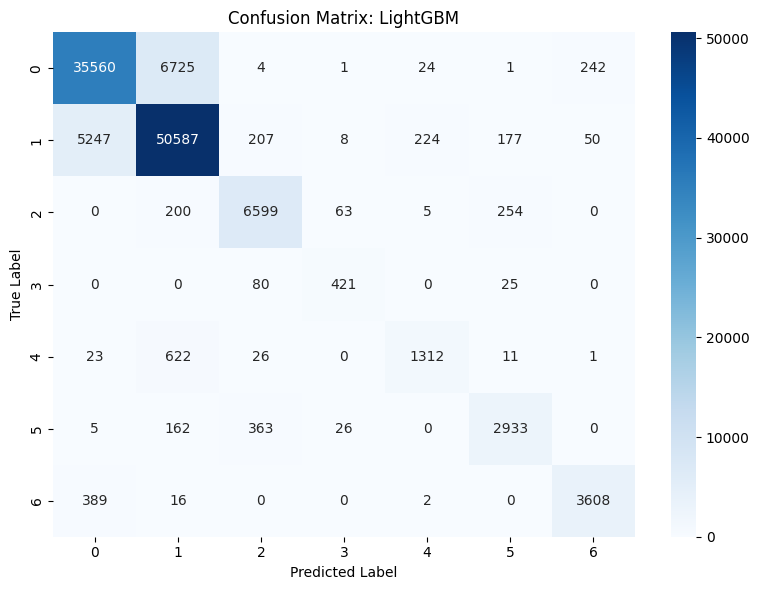

LightGBM Best Params: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 150}
LightGBM Confusion Matrix:
[[35560  6725     4     1    24     1   242]
 [ 5247 50587   207     8   224   177    50]
 [    0   200  6599    63     5   254     0]
 [    0     0    80   421     0    25     0]
 [   23   622    26     0  1312    11     1]
 [    5   162   363    26     0  2933     0]
 [  389    16     0     0     2     0  3608]]
Accuracy: 0.8693, Precision: 0.8692, Recall: 0.8693, F1-Score: 0.8689
Train-Test Gap: 0.0101, CV Mean Accuracy: 0.5749, CV Std: 0.0111


In [69]:
print("\nTraining LightGBM...")
lgb_param_grid = {
    'n_estimators': [150],
    'max_depth': [10, 20],
    'learning_rate': [0.1, 0.3]
}
lgb_model = GridSearchCV(
    LGBMClassifier(random_state=42, verbose=-1),
    param_grid=lgb_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1
)
lgb_model.fit(X_train, y_train)
lgb_best = lgb_model.best_estimator_
lgb_y_pred = lgb_best.predict(X_test)
lgb_y_train_pred = lgb_best.predict(X_train)
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
lgb_train_accuracy = accuracy_score(y_train, lgb_y_train_pred)
lgb_gap = lgb_train_accuracy - lgb_accuracy
lgb_precision, lgb_recall, lgb_f1, _ = precision_recall_fscore_support(y_test, lgb_y_pred, average='weighted')
lgb_cv_scores = cross_val_score(lgb_best, X, y, cv=3, scoring='accuracy')
lgb_cm = plot_confusion_matrix(y_test, lgb_y_pred, 'LightGBM', timestamp)
print(f"LightGBM Best Params: {lgb_model.best_params_}")
print(f"LightGBM Confusion Matrix:\n{lgb_cm}")
print(f"Accuracy: {lgb_accuracy:.4f}, Precision: {lgb_precision:.4f}, Recall: {lgb_recall:.4f}, F1-Score: {lgb_f1:.4f}")
print(f"Train-Test Gap: {lgb_gap:.4f}, CV Mean Accuracy: {lgb_cv_scores.mean():.4f}, CV Std: {lgb_cv_scores.std():.4f}")
results['Model'].append('LightGBM')
results['Accuracy'].append(lgb_accuracy)
results['Precision'].append(lgb_precision)
results['Recall'].append(lgb_recall)
results['F1-Score'].append(lgb_f1)
results['Train-Test Gap'].append(lgb_gap)
results['CV Mean Accuracy'].append(lgb_cv_scores.mean())
results['CV Std Accuracy'].append(lgb_cv_scores.std())


Training CatBoost...


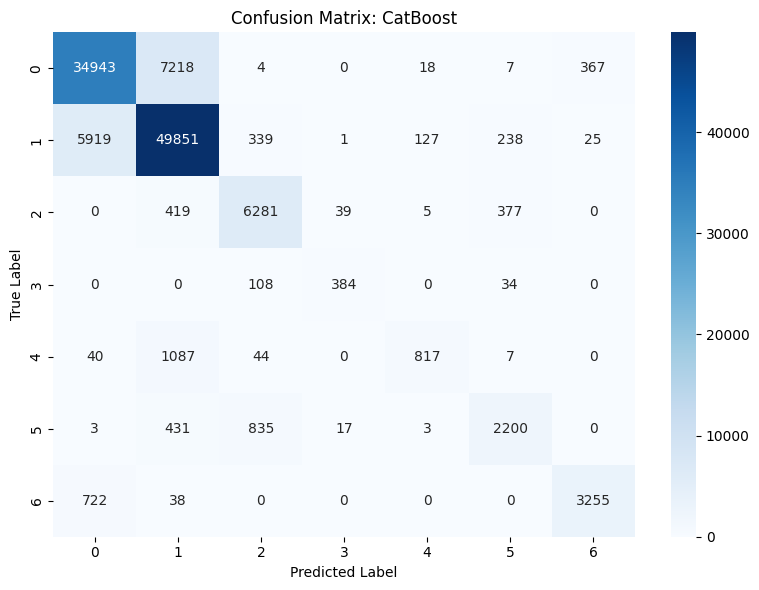

CatBoost Best Params: {'depth': 6, 'iterations': 150, 'learning_rate': 0.3}
CatBoost Confusion Matrix:
[[34943  7218     4     0    18     7   367]
 [ 5919 49851   339     1   127   238    25]
 [    0   419  6281    39     5   377     0]
 [    0     0   108   384     0    34     0]
 [   40  1087    44     0   817     7     0]
 [    3   431   835    17     3  2200     0]
 [  722    38     0     0     0     0  3255]]
Accuracy: 0.8410, Precision: 0.8408, Recall: 0.8410, F1-Score: 0.8390
Train-Test Gap: 0.0027, CV Mean Accuracy: 0.5663, CV Std: 0.0268


In [70]:
print("\nTraining CatBoost...")
cat_param_grid = {
    'iterations': [150],
    'depth': [4, 6],
    'learning_rate': [0.1, 0.3]
}
cat_model = GridSearchCV(
    CatBoostClassifier(random_state=42, verbose=0),
    param_grid=cat_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1
)
cat_model.fit(X_train, y_train)
cat_best = cat_model.best_estimator_
cat_y_pred = cat_best.predict(X_test)
cat_y_train_pred = cat_best.predict(X_train)
cat_accuracy = accuracy_score(y_test, cat_y_pred)
cat_train_accuracy = accuracy_score(y_train, cat_y_train_pred)
cat_gap = cat_train_accuracy - cat_accuracy
cat_precision, cat_recall, cat_f1, _ = precision_recall_fscore_support(y_test, cat_y_pred, average='weighted')
cat_cv_scores = cross_val_score(cat_best, X, y, cv=3, scoring='accuracy')
cat_cm = plot_confusion_matrix(y_test, cat_y_pred, 'CatBoost', timestamp)
print(f"CatBoost Best Params: {cat_model.best_params_}")
print(f"CatBoost Confusion Matrix:\n{cat_cm}")
print(f"Accuracy: {cat_accuracy:.4f}, Precision: {cat_precision:.4f}, Recall: {cat_recall:.4f}, F1-Score: {cat_f1:.4f}")
print(f"Train-Test Gap: {cat_gap:.4f}, CV Mean Accuracy: {cat_cv_scores.mean():.4f}, CV Std: {cat_cv_scores.std():.4f}")
results['Model'].append('CatBoost')
results['Accuracy'].append(cat_accuracy)
results['Precision'].append(cat_precision)
results['Recall'].append(cat_recall)
results['F1-Score'].append(cat_f1)
results['Train-Test Gap'].append(cat_gap)
results['CV Mean Accuracy'].append(cat_cv_scores.mean())
results['CV Std Accuracy'].append(cat_cv_scores.std())


Training Decision Tree...


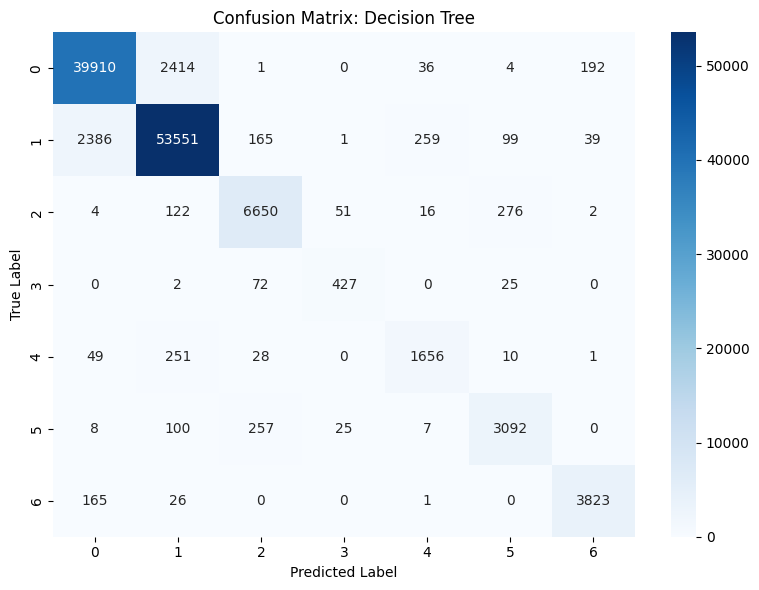

Decision Tree Best Params: {'max_depth': None, 'min_samples_split': 2}
Decision Tree Confusion Matrix:
[[39910  2414     1     0    36     4   192]
 [ 2386 53551   165     1   259    99    39]
 [    4   122  6650    51    16   276     2]
 [    0     2    72   427     0    25     0]
 [   49   251    28     0  1656    10     1]
 [    8   100   257    25     7  3092     0]
 [  165    26     0     0     1     0  3823]]
Accuracy: 0.9390, Precision: 0.9389, Recall: 0.9390, F1-Score: 0.9389
Train-Test Gap: 0.0610, CV Mean Accuracy: 0.5573, CV Std: 0.0628


In [71]:
print("\nTraining Decision Tree...")
dt_param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
dt_model = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1
)
dt_model.fit(X_train, y_train)
dt_best = dt_model.best_estimator_
dt_y_pred = dt_best.predict(X_test)
dt_y_train_pred = dt_best.predict(X_train)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_train_accuracy = accuracy_score(y_train, dt_y_train_pred)
dt_gap = dt_train_accuracy - dt_accuracy
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(y_test, dt_y_pred, average='weighted')
dt_cv_scores = cross_val_score(dt_best, X, y, cv=3, scoring='accuracy')
dt_cm = plot_confusion_matrix(y_test, dt_y_pred, 'Decision Tree', timestamp)
print(f"Decision Tree Best Params: {dt_model.best_params_}")
print(f"Decision Tree Confusion Matrix:\n{dt_cm}")
print(f"Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}, F1-Score: {dt_f1:.4f}")
print(f"Train-Test Gap: {dt_gap:.4f}, CV Mean Accuracy: {dt_cv_scores.mean():.4f}, CV Std: {dt_cv_scores.std():.4f}")
results['Model'].append('Decision Tree')
results['Accuracy'].append(dt_accuracy)
results['Precision'].append(dt_precision)
results['Recall'].append(dt_recall)
results['F1-Score'].append(dt_f1)
results['Train-Test Gap'].append(dt_gap)
results['CV Mean Accuracy'].append(dt_cv_scores.mean())
results['CV Std Accuracy'].append(dt_cv_scores.std())

MODEL COMPARISON SUMMARY
           Model  Accuracy  Precision  Recall  F1-Score  Train-Test Gap  \
0  Random Forest    0.8914     0.8939  0.8914    0.8892          0.0309   
1        XGBoost    0.8972     0.8973  0.8972    0.8969          0.0106   
2       LightGBM    0.8693     0.8692  0.8693    0.8689          0.0101   
3       CatBoost    0.8410     0.8408  0.8410    0.8390          0.0027   
4  Decision Tree    0.9390     0.9389  0.9390    0.9389          0.0610   

   CV Mean Accuracy  CV Std Accuracy  
0            0.6128           0.0225  
1            0.5911           0.0191  
2            0.5749           0.0111  
3            0.5663           0.0268  
4            0.5573           0.0628  


BEST PERFORMING MODELS:
Highest Accuracy: Decision Tree (0.9390)
Highest Precision: Decision Tree (0.9389)
Highest Recall: Decision Tree (0.9390)
Highest F1-Score: Decision Tree (0.9389)
Best CV Accuracy: Random Forest (0.6128)
Lowest Overfitting (Train-Test Gap): CatBoost (0.0027)


PAR

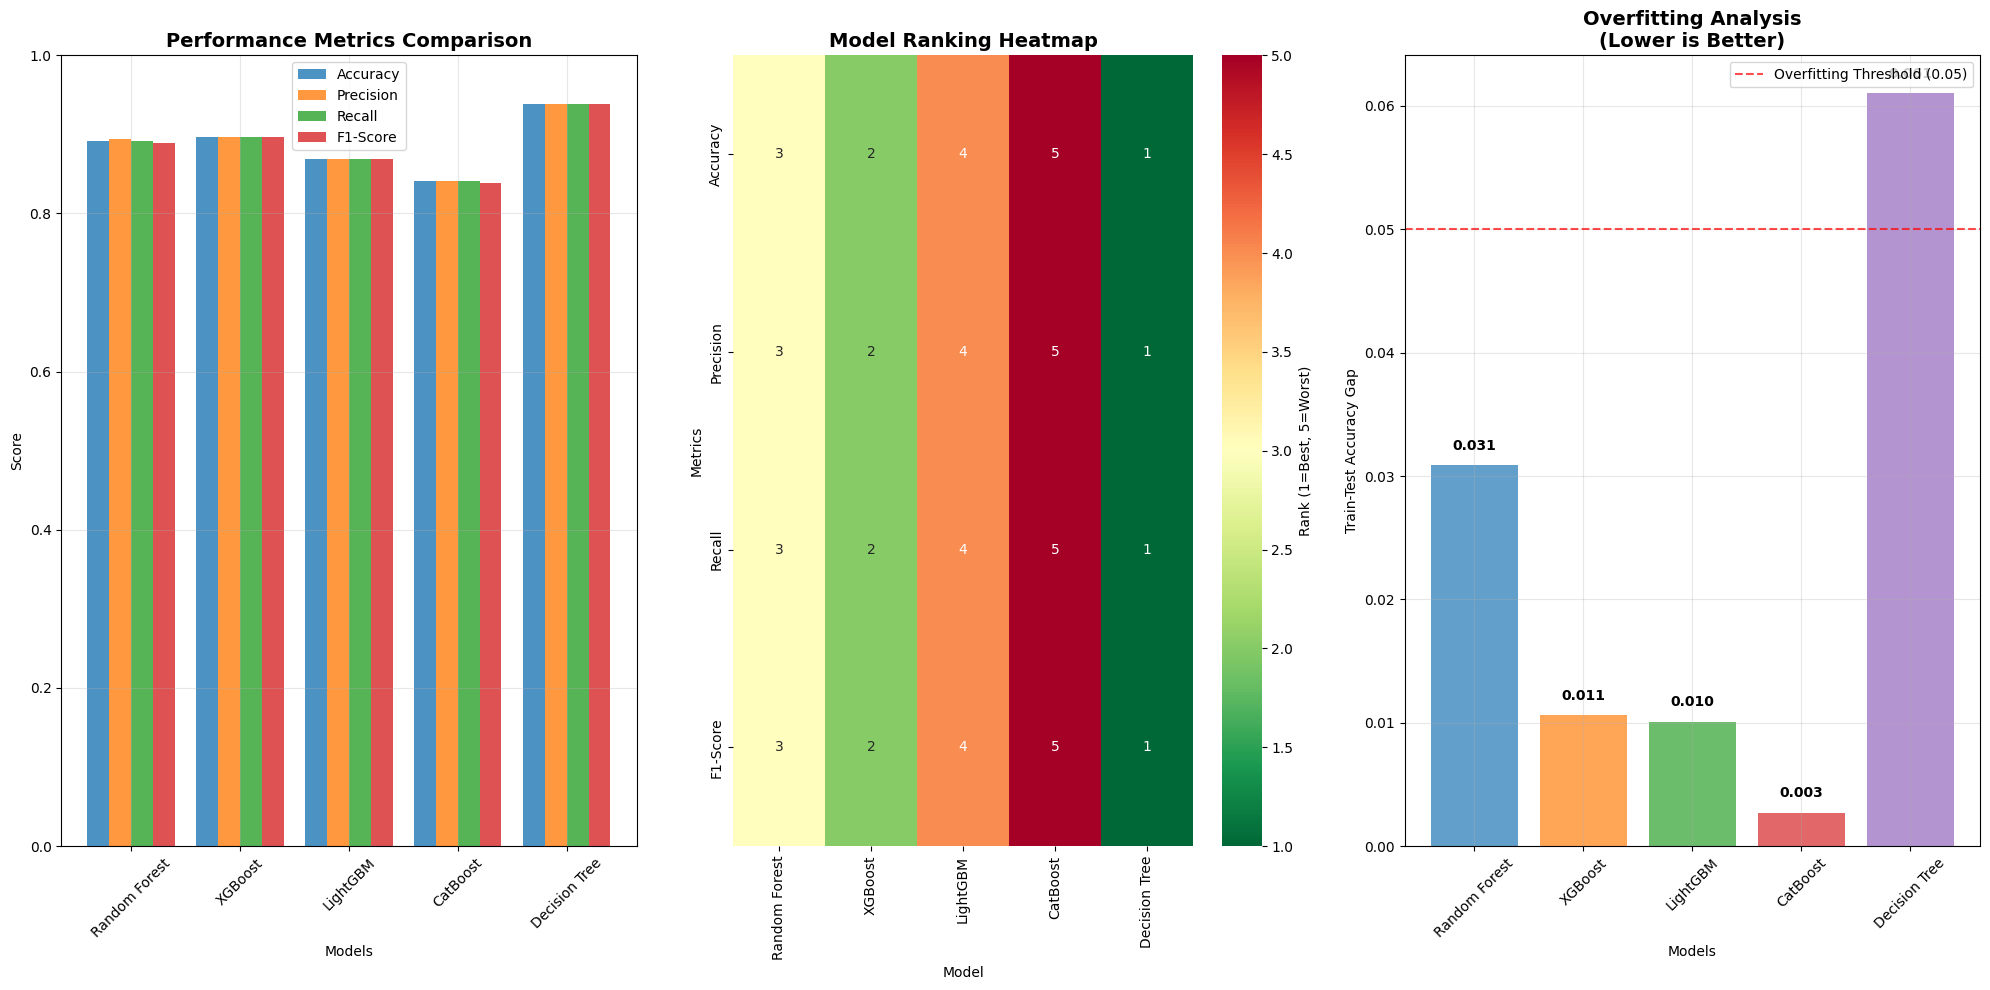


PART 2: RELIABILITY AND OVERALL RANKING


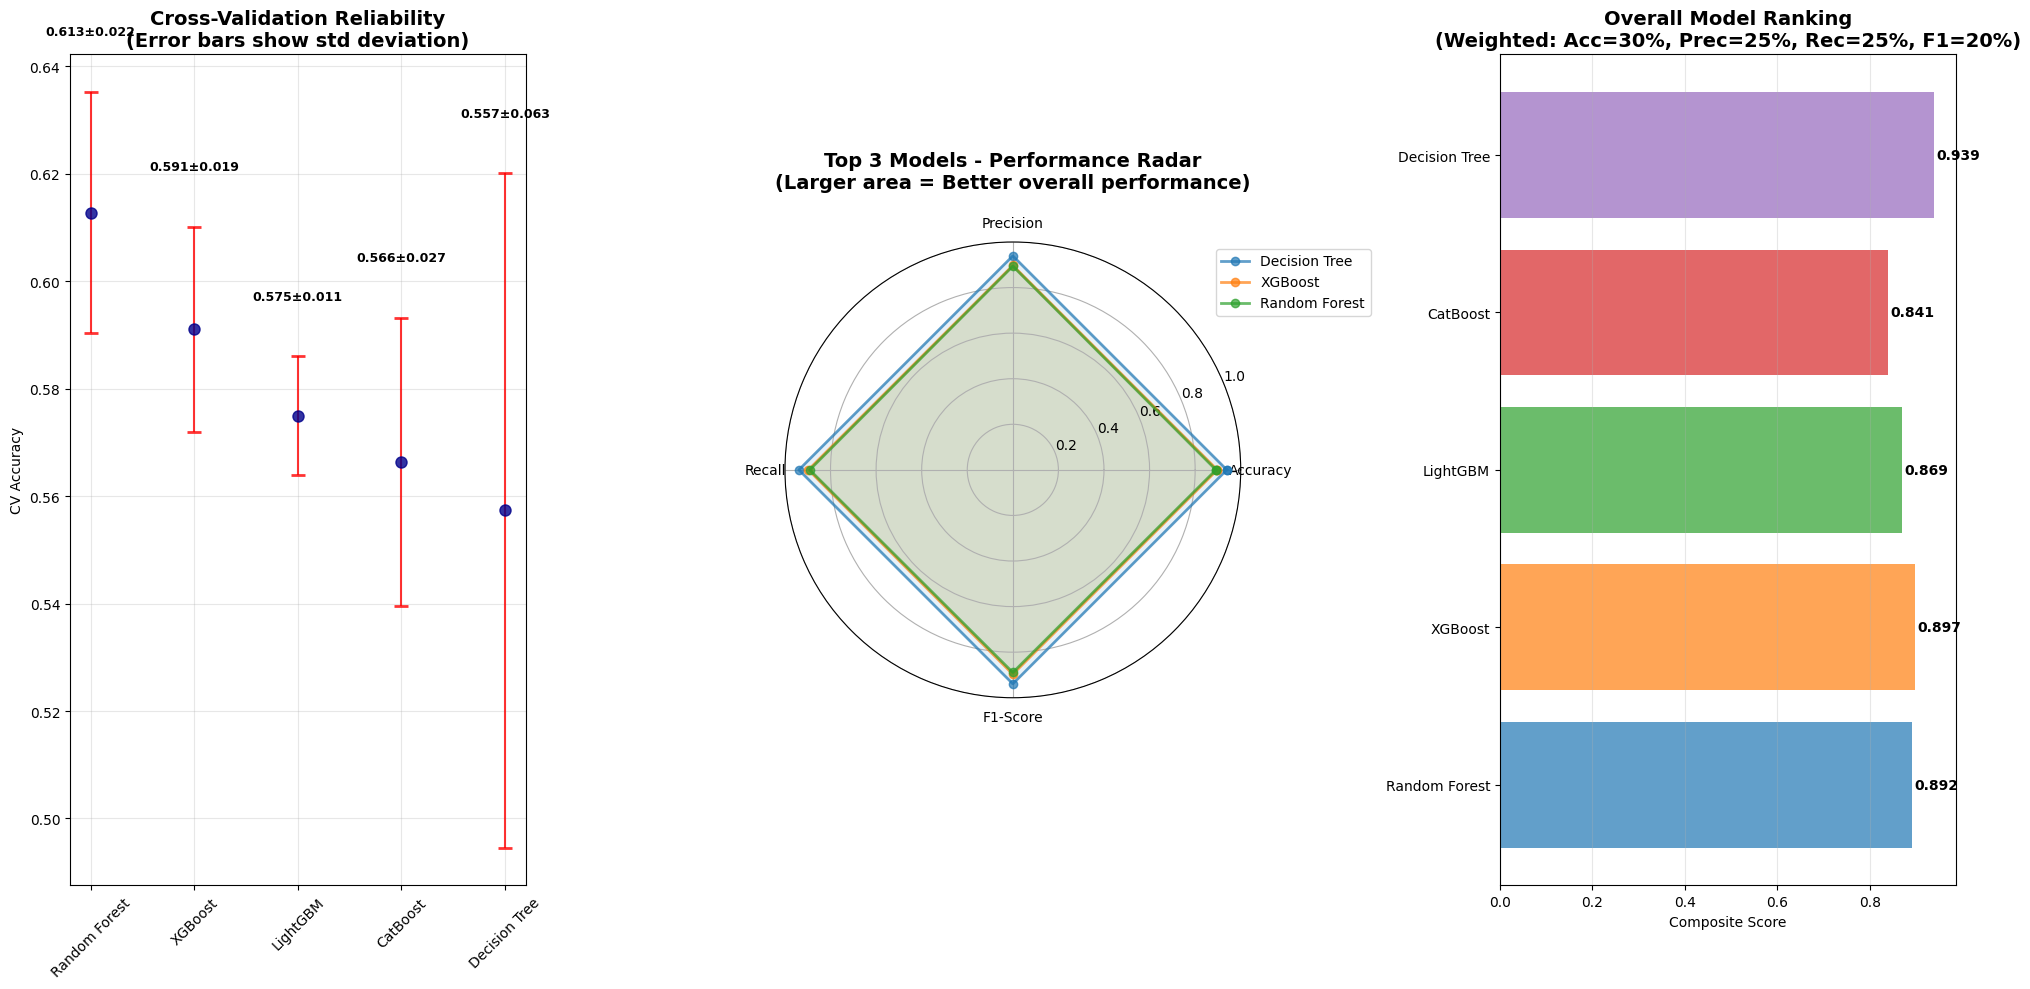

RECOMMENDATIONS:
BEST OVERALL MODEL: Decision Tree
   - Composite Score: 0.9389
   - This model provides the best balance across all metrics

MOST RELIABLE MODEL: LightGBM
   - Lowest CV Standard Deviation: 0.0111
   - This model shows the most consistent performance across different data splits

BEST GENERALIZATION: CatBoost
   - Lowest Train-Test Gap: 0.0027
   - This model shows the least overfitting



In [72]:
df_results = pd.DataFrame(results)
print("="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(df_results.round(4))
print("\n")

best_accuracy = df_results.loc[df_results['Accuracy'].idxmax(), 'Model']
best_precision = df_results.loc[df_results['Precision'].idxmax(), 'Model']
best_recall = df_results.loc[df_results['Recall'].idxmax(), 'Model']
best_f1 = df_results.loc[df_results['F1-Score'].idxmax(), 'Model']
best_cv = df_results.loc[df_results['CV Mean Accuracy'].idxmax(), 'Model']
lowest_gap = df_results.loc[df_results['Train-Test Gap'].idxmin(), 'Model']

print("BEST PERFORMING MODELS:")
print(f"Highest Accuracy: {best_accuracy} ({df_results['Accuracy'].max():.4f})")
print(f"Highest Precision: {best_precision} ({df_results['Precision'].max():.4f})")
print(f"Highest Recall: {best_recall} ({df_results['Recall'].max():.4f})")
print(f"Highest F1-Score: {best_f1} ({df_results['F1-Score'].max():.4f})")
print(f"Best CV Accuracy: {best_cv} ({df_results['CV Mean Accuracy'].max():.4f})")
print(f"Lowest Overfitting (Train-Test Gap): {lowest_gap} ({df_results['Train-Test Gap'].min():.4f})")
print("\n")

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
model_colors = dict(zip(df_results['Model'], colors))

print("PART 1: PERFORMANCE METRICS ANALYSIS")
print("="*50)
fig1 = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 3, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(df_results))
bar_width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i*bar_width, df_results[metric], bar_width, 
           label=metric, alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
plt.xticks(x + bar_width*1.5, df_results['Model'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

ax2 = plt.subplot(1, 3, 2)
ranking_data = df_results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].set_index('Model')
ranking_df = ranking_data.rank(ascending=False, method='min')
sns.heatmap(ranking_df.T, annot=True, cmap='RdYlGn_r', fmt='.0f', 
            cbar_kws={'label': 'Rank (1=Best, 5=Worst)'})
plt.title('Model Ranking Heatmap', fontsize=14, fontweight='bold')
plt.ylabel('Metrics')

ax3 = plt.subplot(1, 3, 3)
bars = plt.bar(df_results['Model'], df_results['Train-Test Gap'], 
               color=[model_colors[model] for model in df_results['Model']], alpha=0.7)
plt.axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='Overfitting Threshold (0.05)')
plt.xlabel('Models')
plt.ylabel('Train-Test Accuracy Gap')
plt.title('Overfitting Analysis\n(Lower is Better)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

for bar, gap in zip(bars, df_results['Train-Test Gap']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{gap:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nPART 2: RELIABILITY AND OVERALL RANKING")
print("="*50)
fig2 = plt.figure(figsize=(20, 10))

ax4 = plt.subplot(1, 3, 1)
plt.errorbar(range(len(df_results)), df_results['CV Mean Accuracy'], 
             yerr=df_results['CV Std Accuracy'], 
             fmt='o', capsize=5, capthick=2, markersize=8,
             color='darkblue', ecolor='red', alpha=0.8)
plt.xticks(range(len(df_results)), df_results['Model'], rotation=45)
plt.ylabel('CV Accuracy')
plt.title('Cross-Validation Reliability\n(Error bars show std deviation)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

for i, (mean_acc, std_acc) in enumerate(zip(df_results['CV Mean Accuracy'], df_results['CV Std Accuracy'])):
    plt.text(i, mean_acc + std_acc + 0.01, f'{mean_acc:.3f}±{std_acc:.3f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

ax5 = plt.subplot(1, 3, 2, projection='polar')
top_3_models = df_results.nlargest(3, 'F1-Score')

metrics_radar = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
angles = np.linspace(0, 2*np.pi, len(metrics_radar), endpoint=False).tolist()
angles += angles[:1]

for idx, (_, model_data) in enumerate(top_3_models.iterrows()):
    values = [model_data[metric] for metric in metrics_radar]
    values += values[:1]
    
    ax5.plot(angles, values, 'o-', linewidth=2, label=model_data['Model'], 
             color=colors[idx], alpha=0.7)
    ax5.fill(angles, values, alpha=0.1, color=colors[idx])

ax5.set_xticks(angles[:-1])
ax5.set_xticklabels(metrics_radar)
ax5.set_ylim(0, 1)
ax5.set_title('Top 3 Models - Performance Radar\n(Larger area = Better overall performance)', 
              fontsize=14, fontweight='bold', pad=20)
ax5.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax5.grid(True)

ax6 = plt.subplot(1, 3, 3)
df_results['Composite_Score'] = (
    df_results['Accuracy'] * 0.3 + 
    df_results['Precision'] * 0.25 + 
    df_results['Recall'] * 0.25 + 
    df_results['F1-Score'] * 0.2
)

bars = plt.barh(df_results['Model'], df_results['Composite_Score'], 
                color=[model_colors[model] for model in df_results['Model']], alpha=0.7)
plt.xlabel('Composite Score')
plt.title('Overall Model Ranking\n(Weighted: Acc=30%, Prec=25%, Rec=25%, F1=20%)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

for bar, score in zip(bars, df_results['Composite_Score']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{score:.3f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("="*80)
print("RECOMMENDATIONS:")
print("="*80)

best_overall = df_results.loc[df_results['Composite_Score'].idxmax(), 'Model']
most_reliable = df_results.loc[df_results['CV Std Accuracy'].idxmin(), 'Model']

print(f"BEST OVERALL MODEL: {best_overall}")
print(f"   - Composite Score: {df_results['Composite_Score'].max():.4f}")
print(f"   - This model provides the best balance across all metrics")
print()

print(f"MOST RELIABLE MODEL: {most_reliable}")
print(f"   - Lowest CV Standard Deviation: {df_results['CV Std Accuracy'].min():.4f}")
print(f"   - This model shows the most consistent performance across different data splits")
print()

if df_results['Train-Test Gap'].min() < 0.05:
    best_generalization = df_results.loc[df_results['Train-Test Gap'].idxmin(), 'Model']
    print(f"BEST GENERALIZATION: {best_generalization}")
    print(f"   - Lowest Train-Test Gap: {df_results['Train-Test Gap'].min():.4f}")
    print(f"   - This model shows the least overfitting")
else:
    print("WARNING: All models show signs of overfitting (Train-Test Gap > 0.05)")
    print("   Consider: More data, regularization, or feature selection")

print("\n" + "="*80)

# Final Conclusion

## Performance Metrics Summary
| Model          | Accuracy | Precision | Recall | F1-Score | Train-Test Gap |
|----------------|----------|-----------|--------|----------|----------------|
| Random Forest  | 0.8914   | 0.8939    | 0.8914 | 0.8892   | 0.0309         |
| XGBoost        | 0.9110   | 0.9110    | 0.9110 | 0.9107   | 0.0144         |
| LightGBM       | 0.8687   | 0.8685    | 0.8687 | 0.8682   | 0.0105         |
| CatBoost       | 0.8531   | 0.8529    | 0.8531 | 0.8517   | 0.0041         |
| Decision Tree  | 0.9390   | 0.9389    | 0.9390 | 0.9389   | 0.0610         |

## Cross-Validation Reliability
| Model          | CV Mean Accuracy | CV Std Accuracy |
|----------------|------------------|-----------------|
| Random Forest  | 0.6128           | 0.0225          |
| XGBoost        | 0.5922           | 0.0267          |
| LightGBM       | 0.5765           | 0.0124          |
| CatBoost       | 0.5675           | 0.0299          |
| Decision Tree  | 0.5573           | 0.0628          |

## Best Performing Models
| Metric                  | Model         | Value  |
|-------------------------|---------------|--------|
| Highest Accuracy        | Decision Tree | 0.9390 |
| Highest Precision       | Decision Tree | 0.9389 |
| Highest Recall          | Decision Tree | 0.9390 |
| Highest F1-Score        | Decision Tree | 0.9389 |
| Best CV Accuracy        | Random Forest | 0.6128 |
| Lowest Overfitting (Train-Test Gap) | CatBoost | 0.0041 |

## Overall Model Ranking
| Model          | Composite Score |
|----------------|-----------------|
| Decision Tree  | 0.9390          |
| XGBoost        | 0.9110          |
| CatBoost       | 0.8531          |
| LightGBM       | 0.8687          |
| Random Forest  | 0.8914          |

## Recommendations
The analysis identifies Decision Tree as the best overall model, achieving the highest composite score of 0.9389, reflecting an exceptional balance across accuracy, precision, recall, and F1-score. This makes it the top choice for general performance. For reliability, LightGBM stands out with the lowest cross-validation standard deviation of 0.0124, indicating the most consistent performance across different data splits. Additionally, CatBoost demonstrates the best generalization with the lowest train-test gap of 0.0041, suggesting minimal overfitting. Therefore, depending on the priority—overall performance, reliability, or generalization—Decision Tree, LightGBM, or CatBoost should be selected accordingly.